# [GITHUB](https://github.com/thnam4500/LTKHDL_FINAL)
# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## THÀNH VIÊN NHÓM 16
|MÃ SỐ|HỌ TÊN|
|:----:|:---:|
|19127472|NGUYỄN BÁ MINH|
|19127481|TRẦN HOÀNG NAM|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## ĐỒ ÁN
**Đề tài đồ án**: Tìm hiểu và phân tích những yếu tố trong 10 phút đầu của 1 trận đấu liên minh huyền thoại có ảnh hưởng như thế nào đến kết quả trận đấu
- Dữ liệu các trận đấu được lấy ở [link này](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
- Dữ liệu có License CC0: Public Domain
- Dữ liệu gồm 1 file duy nhất là data.csv
- Dữ liệu chứa thông tin của khoảng 10.000 trận đấu ở rank kim cương - cao thủ trong khoảng 10 phút đầu game
- Dữ liệu 1 dòng là thông tin của đội xanh và đội đỏ, mỗi đội sẽ có 19 cột chứa thông tin, tổng có 38 cột và 1 cột bluewin là cột kết quả trận đấu, 1 cột id là id của trận đấu, vậy có tất cả 40 cột

### Đọc dữ liệu từ file data.csv và khám phá dữ liệu

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

1 trận đấu gồm 2 đội, đội xanh có 19 cột sau:
- blueWardsPlaced: Số lượng mắt được cắm trong 10'
- blueWardsDestroyed: Số lượng mắt phá huỷ trong 10'
- blueFirstBlood: Đội có được firstblood hay không, gồm 2 giá trị 0,1
- blueKills: Số lượng kill trong 10' đầu
- blueDeaths: Số lượng death trong 10' đầu
- blueAssists: Số lượng assists trong 10' đầu
- blueEliteMonsters: Số lượng elite monster hạ gục trong 10' đầu
- blueDragons: Số lượng rồng hạ gục trong 10' đầu
- blueHeralds: Số lượng sứ giả hạ gục trong 10' đầu
- blueTowersDestroyed: Số lượng tower phá được trong 10' đầu
- blueTotalGold: Tổng số gold trong 10' đầu
- blueAvgLevel:  Level trung bình của các thành viên trong đội trong 10' đầu của đội
- blueTotalExperience: Tổng số lượng exp của cả dội trong 10' đầu
- blueTotalMinionsKilled: Tổng số lượng lính hạ gục của cả đội trong 10' đầu
- blueTotalJungleMinionsKilled: Tổng số quái rừng bị hạ gục trong 10' đầu
- blueGoldDiff: Chêch lệch gold với đổi đội đỏ trong 10' đầu
- blueExperienceDiff: Chêch lệch exp với đội đỏ trong 10' đầu
- blueCSPerMin: số lượng lính hạ gục mỗi phút trong 10' đầu
- blueGoldPerMin: Số lượng gold kiếm được mỗi phút trong 10' đầu

Đội đỏ có tương tự 19 cột như trên

In [4]:
data_df.shape

(9879, 40)

#### Dữ liệu có bao nhiêu dòng, cột, có cột nào có dữ liệu thiếu không, có vấn đề gì với các cột không
- Ta thấy rằng có chính xác 40 cột và 9.879 dòng, tức là khoảng 10.000 dòng như mô tả.
- Xem xét sơ thông tin các cột, ta thấy rằng không có dữ liệu thiếu, không có vấn đề gì cả.

#### Dữ liệu có bị lặp hay không

In [5]:
np.any(data_df.duplicated())

False

Vậy là không có dữ liệu trùng lặp, chúng ta sẽ đi đến bước đặt câu hỏi và phân tích

### TÌM HIỂU VÀ PHÂN TÍCH

##### Câu hỏi 1: Cần tập trung yếu tố nào trong 10 phút đầu game để giành được chiến thắng?
Lợi ích khi trả lời được câu hỏi: Nhận biết được các yếu tố chủ chốt đề giành được thắng lợi quan trọng trong 1 trận đấu, giúp tăng hiểu biết về game và biết được nên ưu tiên làm gì trong giai đoạn đầu trận đấu

Đầu tiên dễ nhìn thấy nhất là ta sẽ xem thử là lựa chọn màu đội có ảnh hưởng đến tỉ lệ thắng hay không(Trong game thì việc ở đội xanh hay đội đỏ sẽ ảnh hưởng đến việc được cấm chọn trước hay sau)

In [6]:
blue = data_df['blueWins']
# blue = 1 là thể hiện đội xanh thắng, blue = 0 là đội đỏ thắng
games_count = data_df.shape[0]

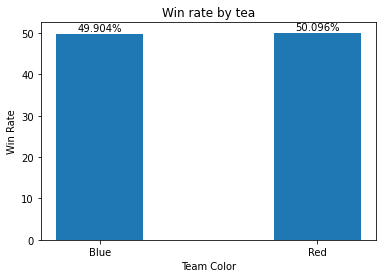

In [7]:
#Xử lí
blue_win_rate = (len(data_df[blue == 1])/games_count) * 100
y = [round(blue_win_rate,3),100-round(blue_win_rate,3)]
x = ['Blue', 'Red']

#Trực quan
bars = plt.bar(x, height=y, width=.4)
plt.xlabel('Team Color')
plt.ylabel('Win Rate')
plt.title('Win rate by tea')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.1, yval + 0.5, f"{yval}%")

plt.show()

Vậy có thể thấy là việc ở team màu nào không ảnh hưởng nhiều đến chiến thắng chung cuộc. 

Tiếp đến ta sẽ đi vào những chỉ số cơ bản nhất của trò chơi đó là số mạng hạ gục, lượng vàng, lượng kinh nghiệm. Ta sẽ tìm hiểu xem sự chênh lệch những yếu tố này trong 10 phút đầu của trận đấu có ảnh hưởng nhiều đến tỉ lệ chiến thắng hay không

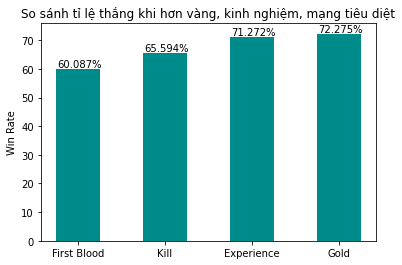

In [8]:
#Xử lí các cột
blue_win_kill = (data_df[blue==1]['blueKills'] - data_df[blue==1]['redKills']) >0
red_win_kill = (data_df[blue==0]['redKills'] - data_df[blue==0]['blueKills']) >0
kill = (blue_win_kill .value_counts()[True] +red_win_kill.value_counts()[True])/games_count

blue_win_exp_diff = (data_df[blue==1]['blueExperienceDiff']) >0
red_win_exp_diff = (data_df[blue==0]['redExperienceDiff']) >0
ExpDiff = (blue_win_exp_diff.value_counts()[True] + red_win_exp_diff.value_counts()[True])/games_count

blue_win_gold_diff = (data_df[blue==1]['blueGoldDiff']) >0
red_win_gold_diff = (data_df[blue==0]['redGoldDiff']) >0
GoldDiff = (blue_win_gold_diff.value_counts()[True] + red_win_gold_diff.value_counts()[True])/games_count

blue_win_first_blood = data_df[blue==1]['blueFirstBlood'].value_counts()[1]
red_win_first_blood = data_df[blue==0]['redFirstBlood'].value_counts()[1]
first_blood = (blue_win_first_blood + red_win_first_blood)/games_count *100

#Trực quan
x = ['First Blood', 'Kill', 'Experience', 'Gold']
y = [round(first_blood,3), round(kill*100,3),round(ExpDiff*100,3), round(GoldDiff*100,3)]
bars = plt.bar(x, height=y, width=.5, color='darkcyan')
plt.ylabel('Win Rate')
plt.title('So sánh tỉ lệ thắng khi hơn vàng, kinh nghiệm, mạng tiêu diệt')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01, yval+0.5, f"{yval}%")

plt.show()

Nhận xét: Có thể thấy cả 4 yếu tố đều ảnh hưởng đến tỉ lệ thắng nhưng tỉ lệ Experience và Gold khá vượt trội so với Kill và First Blood. Vậy có thể thấy là trong 10 phút đầu tiên thì việc có được First Blood(mạng hạ gục đầu tiên trong trận đấu) hay chênh lệch Kill có ảnh hưởng đến tỉ lệ thắng nhưng tầm quan trọng của chúng không bằng so với Experience và Gold vì vậy Experience và Gold là 2 yếu tố nên được ưu tiên hơn trong 10 phút đầu của trận đấu.

Tiếp đến sẽ là những yếu tố ít được tập trung vào hơn khi nhắc đến 1 trò chơi.

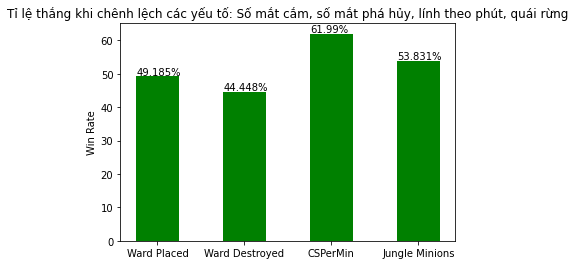

In [9]:
#Xử lí các cột
blue_win_ward_placed = (data_df[blue==1]['blueWardsPlaced'] - data_df[blue==1]['redWardsPlaced']) > 0
red_win_ward_placed = (data_df[blue==0]['redWardsPlaced'] - data_df[blue==0]['blueWardsPlaced']) > 0
ward_placed = (red_win_ward_placed.value_counts()[True] + blue_win_ward_placed.value_counts()[True])/games_count

blue_win_ward_destroyed = (data_df[blue==1]['blueWardsDestroyed'] - data_df[blue==1]['redWardsDestroyed']) > 0
red_win_ward_destroyed = (data_df[blue==0]['redWardsDestroyed'] - data_df[blue==0]['blueWardsDestroyed']) > 0
ward_destroyed = (red_win_ward_destroyed.value_counts()[True] + blue_win_ward_destroyed.value_counts()[True])/games_count

blue_win_CSPerMin = (data_df[blue==1]['blueCSPerMin'] - data_df[blue==1]['redCSPerMin']) > 0
red_win_CSPerMin = (data_df[blue==0]['redCSPerMin'] - data_df[blue==0]['blueCSPerMin']) > 0
CSPerMin = (red_win_CSPerMin.value_counts()[True] + blue_win_CSPerMin.value_counts()[True])/games_count

blue_win_TotalJungleMinionsKilled = (data_df[blue==1]['blueTotalJungleMinionsKilled'] - data_df[blue==1]['redTotalJungleMinionsKilled']) > 0
red_win_TotalJungleMinionsKilled = (data_df[blue==0]['redTotalJungleMinionsKilled'] - data_df[blue==0]['blueTotalJungleMinionsKilled']) > 0
TotalJungleMinionsKilled = (red_win_TotalJungleMinionsKilled.value_counts()[True] + blue_win_TotalJungleMinionsKilled.value_counts()[True])/games_count

#Trực quan
x = ['Ward Placed', 'Ward Destroyed', 'CSPerMin', 'Jungle Minions']
y = [round(ward_placed*100,3), round(ward_destroyed*100,3),round(CSPerMin*100,3), round(TotalJungleMinionsKilled*100,3)]
bars = plt.bar(x, height=y, width=.5, color='green')
plt.ylabel('Win Rate')
plt.title('Tỉ lệ thắng khi chênh lệch các yếu tố: Số mắt cắm, số mắt phá hủy, lính theo phút, quái rừng')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01, yval+0.5, f"{yval}%")



Có thể thấy là chỉ số CSPerMin và JungleMinions rất quan trọng và có ảnh hưởng nhiều đến trận đấu, chỉ số WardPlaced và WardDestroyed có ảnh hưởng nhưng có lẽ là trong 10 phút đầu của trận đấu nên ưu tiên các chỉ số kia hơn

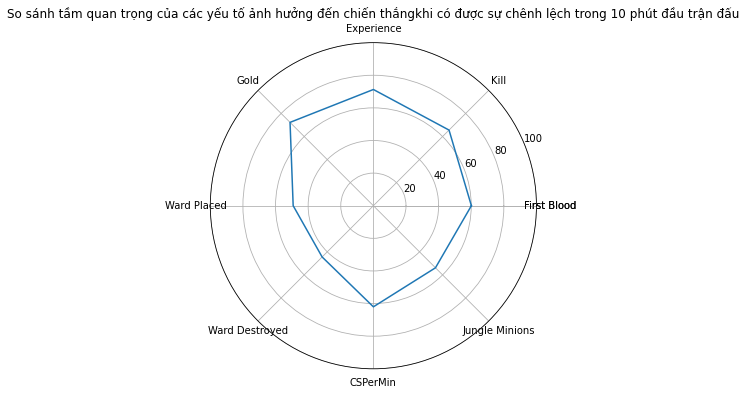

In [10]:
categories = ['First Blood', 'Kill', 'Experience', 'Gold', 'Ward Placed', 'Ward Destroyed', 'CSPerMin', 'Jungle Minions', 'First Blood']
vehicle = [round(first_blood,3), round(kill*100,3),round(ExpDiff*100,3), round(GoldDiff*100,3), round(ward_placed*100,3), round(ward_destroyed*100,3),round(CSPerMin*100,3), round(TotalJungleMinionsKilled*100,3), round(first_blood,3)]
placement = np.linspace(start=0, stop=2*np.pi, num=len(vehicle))
plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(placement, vehicle)
lines, labels = plt.thetagrids(np.degrees(placement), labels=categories)
plt.ylim([0,100])
plt.title("So sánh tầm quan trọng của các yếu tố ảnh hưởng đến chiến thắngkhi có được sự chênh lệch trong 10 phút đầu trận đấu")
plt.show()

Kết luận: Vậy dựa vào các phân tích trên có thể trả lời câu hỏi đặt ra ban đầu là các yếu tố cần phải tập trung nhiều hơn trong 10 phút đầu để giành chiến thắng trong 1 trận đấu liên minh huyền thoại là Kill, Experience và Gold. 
Tất nhiên tất cả yếu tố trên đều quan trọng và không nên chỉ tập trung vào 3 yếu tố đó mà bỏ quên những yếu tố khác.

Tiếp đến sẽ là thống kê tỉ lệ thắng khi ăn hay không ăn mục tiêu lớn. Ở đây sẽ tập trung vào 2 chỉ số rất đặc biệt là Dragon và Herald. 2 chỉ số này không phải luôn luôn có vào 10 phút đầu, nhưng vẫn là những chỉ số rất quan trọng

In [11]:
# Thống kê các trận mà đội xanh ăn được mục tiêu(rồng và sứ giả): có 4 trường hợp
#True là đội xanh thắng, False là thua
blue_elite = pd.crosstab([data_df['blueDragons'], data_df['blueHeralds']], data_df.blueWins.astype(bool))
blue_elite

blueWins                 False  True 
blueDragons blueHeralds              
0           0             3101   2055
            1              564    583
1           0             1096   1770
            1              188    522

In [12]:
# Thống kê các trận mà đội đỏ ăn được mục tiêu(rồng và sứ giả): có 4 trường hợp
# False ở đây sẽ là đội đỏ thắng, do data chỉ có 1 cột là bluewins.
red_elite = pd.crosstab([data_df['redDragons'], data_df['redHeralds']], data_df.blueWins.astype(bool))
red_elite 

blueWins               False  True 
redDragons redHeralds              
0          0            1948   2999
           1             447    404
1          0            2033   1318
           1             521    209

In [13]:
blue_elite_stat = []
for i in range(2):
    for j in range(2):
        blue_elite_stat.append(round(blue_elite[True][i][j]/(blue_elite[True][i][j]+blue_elite[False][i][j])*100,2))
red_elite_stat = []
for i in range(2):
    for j in range(2):
        red_elite_stat.append(round(red_elite[False][i][j]/(red_elite[True][i][j]+red_elite[False][i][j])*100,2))

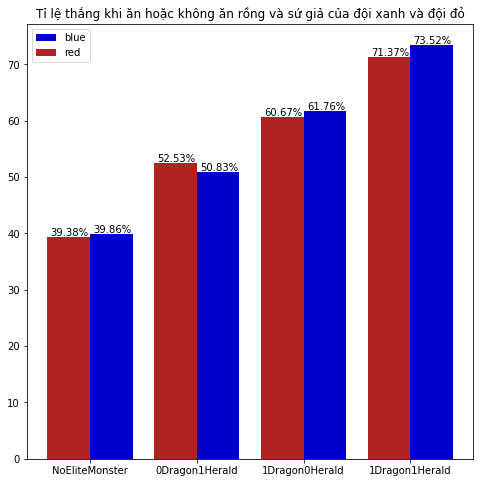

In [14]:
#Trực quan
x = ['NoEliteMonster', '0Dragon1Herald', '1Dragon0Herald', '1Dragon1Herald']
xpos = np.arange(4)
plt.figure(figsize=(8,8))
plt.xticks(xpos, x)
bars1 = plt.bar(xpos + .2, blue_elite_stat, width=.4, color='mediumblue', label='blue')
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.03, yval+0.25, f"{yval}%")
bars2 = plt.bar(xpos - .2, red_elite_stat, width=.4, color='firebrick', label='red')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.03, yval+0.25, f"{yval}%")
plt.title("Tỉ lệ thắng khi ăn hoặc không ăn rồng và sứ giả của đội xanh và đội đỏ")
plt.legend()
plt.show()

Vậy có thể thấy là nếu không ăn được rồng hay sứ giả thì tỉ lệ giành được chiến thắng rất thấp, nên các đội cần giành sự tập trung cho rồng và sứ giả nhiều hơn nếu muốn có được chiến thắng. Còn việc ăn được cả 2 mục tiêu sẽ giúp đội đạt được tỉ lệ thắng rất cao nên tốt nhất là ưu tiên ăn các mục tiêu đó để có thể chiến thắng trận đấu, ít nhất là cũng nên giành được 1 mục tiêu, và có lẽ rồng đang có vai trò quan trọng hơn với các đội. 

##### Câu hỏi 2: Nếu chúng ta thua gold hay exp trong 10' phút đầu thì liệu chúng ta có cơ hội chiến thắng trận đấu hay không? 
Nếu trả lời được câu hỏi này, chúng ta sẽ biết được nên giữ cho khoảng cách exp và gold cách biệt ở mức nào để có khả năng lật ngược ván đấu, cũng như cách biệt như thế nào thì khả năng thắng của chúng ta chắc chắn hơn

Đầu tiên, chúng ta sẽ lọc ra những attribute của đội xanh và đỏ và lưu chúng vào 2 biến **red_att** and **blue_att**

In [15]:
blue_att = [x for x in data_df.keys() if 'blue' in x]
blue_att.remove('blueWins')
red_att = [x for x in data_df.keys() if 'red' in x]

Chúng ta sẽ viết hàm để tính giá trị trung bình, độ lệch chuẩn của exp, gold 

In [16]:
def mean_std(data,team='blue'):
    mean_exp = data[team+'TotalExperience'].mean()
    std_exp = data[team+'TotalExperience'].std()
    mean_gold = data[team+'TotalGold'].mean()
    std_gold = data[team+'TotalGold'].std()
    return mean_exp, std_exp, mean_gold, std_gold

Hàm std_range_percent sẽ làm các việc sau đây:
- Chuyển gold, exp về dạng z-score
- Lọc ra nhưng mẫu có z-score thuộc khoảng (std_start, std_end]
- Tính tỉ lệ thắng của các mẫu đó

In [17]:
def std_range_percent(data,range_std_start,range_std_end,team='blue'):
    mean_exp, std_exp, mean_gold, std_gold = mean_std(data,team)
    data['z_score_'+team+'_exp'] = (data[team+'TotalExperience'] - mean_exp)/std_exp
    data['z_score_'+team+'_gold'] = (data[team+'TotalGold'] - mean_gold)/std_gold
    data_exp = data[((data['z_score_'+team+'_exp']>range_std_start)&(data['z_score_'+team+'_exp']<=range_std_end))]
    data_gold = data[(data['z_score_'+team+'_gold']>range_std_start)&(data['z_score_'+team+'_gold']<=range_std_end)]
    if team == 'blue':
        return (data_exp['blueWins']==1).mean()*100, (data_gold['blueWins']==1).mean()*100
    else:
        return (data_exp['blueWins']==0).mean()*100, (data_gold['blueWins']==0).mean()*100

Ở đây, chúng ta sẽ xem xét nếu lượng exp, gold chêch khỏi độ lệch bao nhiêu thì vẫn có khả năng gỡ lại

In [18]:
std_check=[[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]

In [19]:
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_exp, win_gold = std_range_percent(data_df,x[0],x[1],team='blue')
    blue_win_percent_by_exp.append(win_exp)
    blue_win_percent_by_gold.append(win_gold)
    win_exp, win_gold = std_range_percent(data_df,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_exp)
    red_win_percent_by_gold.append(win_gold)

Block này chỉ dùng để tiện cho việc rename lại index các dòng

In [20]:
range_std_list = {}
for x in range(0,len(std_check)):
    range_std_list[x]=std_check[x]

- Chúng ta sẽ tiến hành tạo dataframe cho 4 kết quả vừa thu được ở trên, các list dữ liệu ở trên chỉ là tỉ lệ thắng, chúng ta sẽ tính cả tỉ lệ thua bằng cách lấy 100 - tỉ lệ thắng lưu vào 1 cột gọi là lose by exp, lose by gold trong các dataframe tương ứng
- Do 1 trận đấu chúng ta có 2 gồm đội xanh và đội đỏ, vì thế nên chúng ta sẽ phải tạo ra 4 dataframe gồm:
    - blue_win_percent_by_exp: tỉ lệ thắng của đội xanh dựa trên khoảng cách về exp
    - blue_win_percent_by_gold: tỉ lệ thắng của đội xanh dựa trên khoảng cách về gold
    - red_win_percent_by_exp: tỉ lệ thắng của đội đỏ dựa trên khoảng cách về exp
    - red_win_percent_by_gold: tỉ lệ thắng của đội đỏ dựa trên khoảng cách về gold

In [21]:
#Tạo dataframe mục đích cho việc xem xét các thông số
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [22]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",9.417040,90.582960
"[-2, -1]",21.704815,78.295185
"[-1, 0]",39.538369,60.461631
"[0, 1]",59.039954,40.960046
"[1, 2]",80.754996,19.245004
"[2, 3]",93.023256,6.976744


In [23]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",2.040816,97.959184
"[-2, -1]",18.683652,81.316348
"[-1, 0]",39.399676,60.600324
"[0, 1]",62.293520,37.706480
"[1, 2]",79.313233,20.686767
"[2, 3]",89.781022,10.218978


In [24]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",11.538462,88.461538
"[-2, -1]",22.377049,77.622951
"[-1, 0]",39.579685,60.420315
"[0, 1]",59.653179,40.346821
"[1, 2]",79.613095,20.386905
"[2, 3]",89.221557,10.778443


In [25]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",7.000000,93.000000
"[-2, -1]",18.024862,81.975138
"[-1, 0]",41.205345,58.794655
"[0, 1]",61.224490,38.775510
"[1, 2]",79.402262,20.597738
"[2, 3]",87.931034,12.068966


Để cho dễ nhìn, chúng ta sẽ trực quan hoá hết 4 table trên bằng stackbarchart

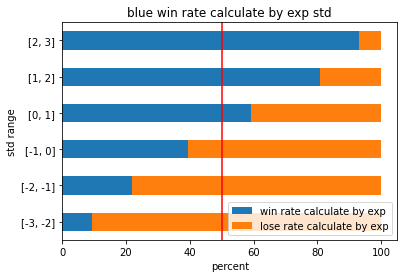

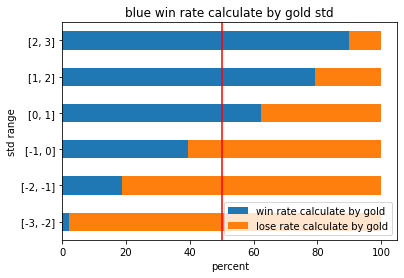

In [26]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.title('blue win rate calculate by gold std')
plt.xlabel('percent')
plt.show()

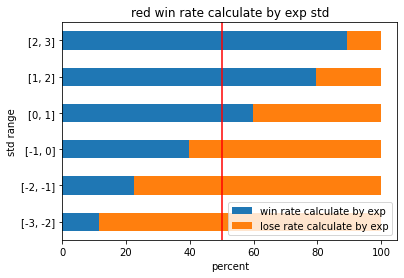

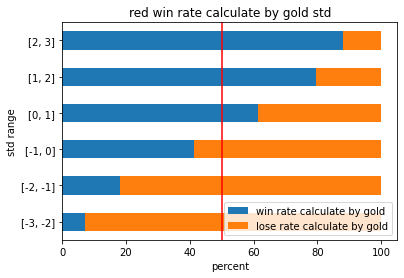

In [27]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: Nhìn chung, với sự chênh lệch về gold và exp càng cao thì tỉ lệ tách biệt thắng thua sẽ càng cao, nhưng theo biểu đồ trên, chúng ta dễ dàng nhận thấy, độ chêck trong khoản từ -1 cho đến 1 độ lệch chuẩn của gold và exp thì tỉ lệ thắng thua chỉ là khoảng 40-60 hoặc ngược lại,tính ra không quá chênh lệch với tỉ lệ thắng thua ngẫu nhiên là 50%, và nếu so tỉ lệ thắng của đội xanh,đỏ trong mẫu dữ liệu ban đầu thì cũng không chênh lệch quá nhiều, nhưng từ 1 đến 2 lại thì tỉ lệ thắng thua  lại tăng thêm hẳn 20%, nghĩa là để lật ngược 1 ván đấu, thì chúng ta cần giữ cho độ chênh về gold và exp không vượt quá 1 độ lệch chuẩn thì vẫn còn đủ khả năng để thắng ngược, tuy nhiên dù cho độ chênh lệch có cao thế nào thì vẫn không chắc chắn việc thắng thua hoàn toàn được, vẫn có khoảng 10% tỉ lệ thắng khi sự chênh lệch tầm khoảng 2 đến 3 độ lệch chuẩn, có vẻ ngoài gold và exp thì vẫn có những yếu tố khác ảnh hưởng, hoặc cũng có thể sau khi qua 10' đầu của trận đấu thì độ lệch này đã được thay đổi, chúng ta sẽ xem xét đến các mục tiêu lớn

##### Câu hỏi 3: Khi ăn các mục tiêu lớn thì khả năng thắng tăng như thế nào?
Lợi ích khi trả lời được câu hỏi này: Chúng ta có thể quyết định nhanh rằng mục tiêu lớn nào nên được ưu tiên, có thể thay thế mục tiêu lớn đó bằng một mục tiêu lớn khác không, cụ thể là rồng và sứ giả

<p>Có 2 mục tiêu lớn mà chúng ta cần quan tâm là rồng và sứ giả, tạm thời chúng ta sẽ xem xét dragon trước</p>
Chúng ta sẽ lọc ra những trận đấu mà đội đỏ ăn rồng và đội xanh ăn rồng, sau đó lưu vào 2 biến <b>red_dragon</b> và <b>blue_dragon</b>

In [28]:
red_dragon = (data_df[data_df['redDragons']!=0]).copy()
blue_dragon = (data_df[(data_df['blueDragons']!=0)]).copy()

Chúng ta sẽ tính tỉ lệ thắng đối với các đội ăn được rồng

In [29]:
red_dragon_wins = (red_dragon["blueWins"]==0).mean()*100
blue_dragon_wins = (blue_dragon["blueWins"]==1).mean()*100
print(f'Tỉ lệ thắng của đội xanh khi ăn rồng là: {blue_dragon_wins:<.2f}%')
print(f'Tỉ lệ thắng của đội đỏ khi ăn rồng là: {red_dragon_wins:<.2f}%')

Tỉ lệ thắng của đội xanh khi ăn rồng là: 64.09%
Tỉ lệ thắng của đội đỏ khi ăn rồng là: 62.58%


Tương tự như ở **câu hỏi 2**, chúng ta sẽ tính tỉ lệ thắng dựa trên gold và exp bằng 2 bộ dữ liệu đã lọc ra là **blue_dragon** và **red_dragon**

In [30]:
std_check = [[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(blue_dragon,x[0],x[1])
    blue_win_percent_by_exp.append(win_rate_by_exp_std)
    blue_win_percent_by_gold.append(win_rate_by_gold_std)
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(red_dragon,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_rate_by_exp_std)
    red_win_percent_by_gold.append(win_rate_by_gold_std)

In [31]:
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [32]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",21.917808,78.082192
"[-2, -1]",35.331906,64.668094
"[-1, 0]",56.389118,43.610882
"[0, 1]",72.516026,27.483974
"[1, 2]",91.056911,8.943089
"[2, 3]",100.000000,0.000000


In [33]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",10.000000,90.000000
"[-2, -1]",39.583333,60.416667
"[-1, 0]",55.808656,44.191344
"[0, 1]",73.752151,26.247849
"[1, 2]",89.024390,10.975610
"[2, 3]",94.392523,5.607477


In [34]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",18.627451,81.372549
"[-2, -1]",40.076336,59.923664
"[-1, 0]",54.668567,45.331433
"[0, 1]",70.749280,29.250720
"[1, 2]",87.413793,12.586207
"[2, 3]",90.140845,9.859155


In [35]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",15.217391,84.782609
"[-2, -1]",33.996683,66.003317
"[-1, 0]",56.386499,43.613501
"[0, 1]",72.641509,27.358491
"[1, 2]",86.770428,13.229572
"[2, 3]",88.235294,11.764706


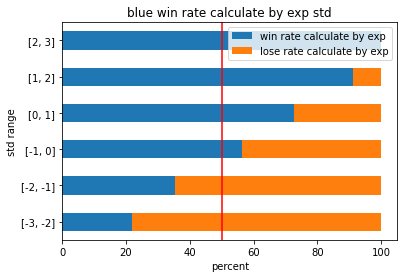

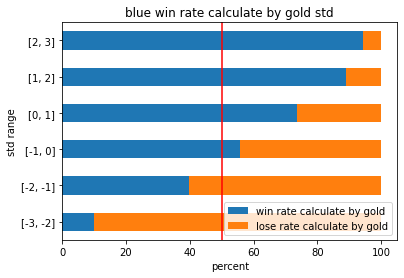

In [36]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by gold std')
plt.show()

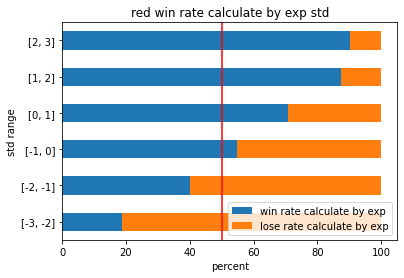

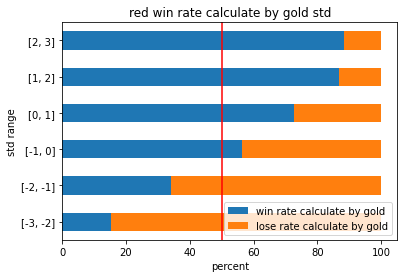

In [37]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: so sánh 4 biểu đồ ở câu 1 với 4 biểu đồ trên, chúng ta nhận thấy tỉ lệ thắng khi ăn rồng đã tăng lên đáng kể, ngay cả khi vàng và exp thua đối thủ khoảng 1 đến 2 độ lệch chuẩn thì tỉ lệ thắng vẫn hơn 30%, nếu chỉ thua trong tầm khoảng 0-1 độ lệch chuẩn thì tỉ lệ thắng lại hơn 50%, nếu không ăn rồng thì 2 con số này chỉ tầm 20% và 40% như phần biểu đồ trong **câu hỏi 2**

Tóm lại, khi đang trong thế thua của 1 ván đấu, nhất là về exp và gold thì bạn cần tập trung vào mục tiêu lớn là rồng, việc ăn rồng có thể bù đắp được việc thua về lượng exp và gold nhận được ở trong khoảng chêch lệch 1 độ lệch chuẩn

Còn 1 mục tiêu lớn còn lại là sứ giả, trong 1 trận đấu, **giả sử đội bạn đang ăn rồng, thì chúng ta nên ăn sứ giả, hay là tham gia tranh chấp rồng?**

Tương tự như phần trên, chúng ta sẽ lọc ra các trận đội xanh, đỏ ăn sứ giả và lưu vào biến **blue_herald** và **red_herald**

In [38]:
blue_herald = (data_df[data_df['blueHeralds']!=0]).copy()
red_herald = (data_df[data_df['redHeralds']!=0]).copy()

Dễ dàng chúng ta tính được tỉ lệ thắng của các đội chọn ăn sứ giả là

In [39]:
print(f'Tỉ lệ thắng của đội xanh khi ăn sứ giả là: {(blue_herald["blueWins"]==1).mean()*100:<.2f}')
print(f'Tỉ lệ thắng của đội đỏ khi ăn sứ giả là: {(red_herald["blueWins"]==0).mean()*100:<.2f}')

Tỉ lệ thắng của đội xanh khi ăn sứ giả là: 59.50
Tỉ lệ thắng của đội đỏ khi ăn sứ giả là: 61.23


**Nhận xét**: Có vẻ như tỉ lệ thắng của các đội chọn ăn sứ giả thấp hơn là các đội chọn ăn rồng ở 10' đầu trận đấu, nhưng tỉ lệ chêch lệch chỉ khoảng 5%, chúng ta có thể tạm chấp nhận được

In [40]:
std_check = [[-3,-2],[-2,-1],[-1,0],[0,1],[1,2],[2,3]]
blue_win_percent_by_exp = []
blue_win_percent_by_gold = []
red_win_percent_by_exp = []
red_win_percent_by_gold = []
for x in std_check:
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(blue_herald,x[0],x[1])
    blue_win_percent_by_exp.append(win_rate_by_exp_std)
    blue_win_percent_by_gold.append(win_rate_by_gold_std)
    win_rate_by_exp_std, win_rate_by_gold_std = std_range_percent(red_herald,x[0],x[1],team='red')
    red_win_percent_by_exp.append(win_rate_by_exp_std)
    red_win_percent_by_gold.append(win_rate_by_gold_std)

In [41]:
blue_win_percent_by_exp = pd.DataFrame(blue_win_percent_by_exp)
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
blue_win_percent_by_exp = blue_win_percent_by_exp.rename(index=range_std_list)
blue_win_percent_by_exp['lose rate calculate by exp'] = 100 - blue_win_percent_by_exp['win rate calculate by exp'] 

blue_win_percent_by_gold = pd.DataFrame(blue_win_percent_by_gold)
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
blue_win_percent_by_gold = blue_win_percent_by_gold.rename(index=range_std_list)
blue_win_percent_by_gold['lose rate calculate by gold'] = 100 - blue_win_percent_by_gold['win rate calculate by gold'] 

red_win_percent_by_exp = pd.DataFrame(red_win_percent_by_exp)
red_win_percent_by_exp = red_win_percent_by_exp.rename(columns={0:'win rate calculate by exp'})
red_win_percent_by_exp = red_win_percent_by_exp.rename(index=range_std_list)
red_win_percent_by_exp['lose rate calculate by exp'] = 100 - red_win_percent_by_exp['win rate calculate by exp'] 

red_win_percent_by_gold = pd.DataFrame(red_win_percent_by_gold)
red_win_percent_by_gold = red_win_percent_by_gold.rename(columns={0:'win rate calculate by gold'})
red_win_percent_by_gold = red_win_percent_by_gold.rename(index=range_std_list)
red_win_percent_by_gold['lose rate calculate by gold'] = 100 - red_win_percent_by_gold['win rate calculate by gold'] 

In [42]:
blue_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",23.076923,76.923077
"[-2, -1]",30.705394,69.294606
"[-1, 0]",53.917051,46.082949
"[0, 1]",67.096774,32.903226
"[1, 2]",81.467181,18.532819
"[2, 3]",97.674419,2.325581


In [43]:
blue_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",5.263158,94.736842
"[-2, -1]",32.222222,67.777778
"[-1, 0]",50.877193,49.122807
"[0, 1]",70.151771,29.848229
"[1, 2]",84.782609,15.217391
"[2, 3]",94.117647,5.882353


In [44]:
red_win_percent_by_exp

,win rate calculate by exp,lose rate calculate by exp
"[-3, -2]",16.216216,83.783784
"[-2, -1]",32.512315,67.487685
"[-1, 0]",53.644860,46.355140
"[0, 1]",71.480804,28.519196
"[1, 2]",85.217391,14.782609
"[2, 3]",86.363636,13.636364


In [45]:
red_win_percent_by_gold

,win rate calculate by gold,lose rate calculate by gold
"[-3, -2]",0.000000,100.000000
"[-2, -1]",28.691983,71.308017
"[-1, 0]",55.631399,44.368601
"[0, 1]",71.779141,28.220859
"[1, 2]",86.473430,13.526570
"[2, 3]",93.181818,6.818182


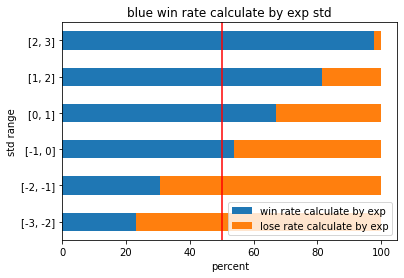

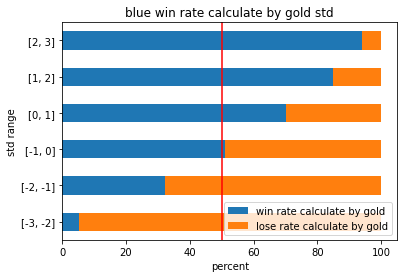

In [46]:
blue_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by exp std')
blue_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('blue win rate calculate by gold std')
plt.show()

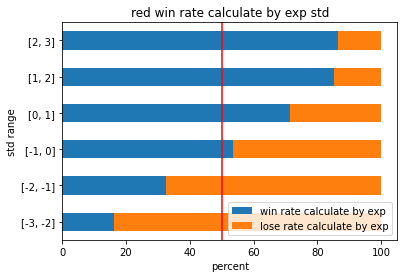

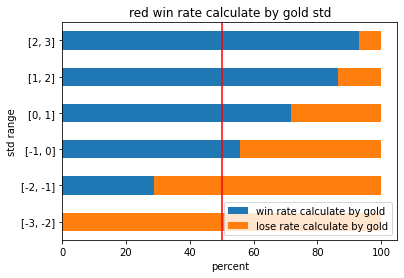

In [47]:
red_win_percent_by_exp.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by exp std')
red_win_percent_by_gold.plot(kind='barh',stacked=True)
plt.axvline(50,color='red')
plt.ylabel('std range')
plt.xlabel('percent')
plt.title('red win rate calculate by gold std')
plt.show()

**Nhận xét**: So sánh với những đội chọn ăn rồng, thì có vẻ như tỉ lệ thắng có vẻ thấp hơn một vài %, điều này có thể chấp nhận được, nhưng chúng ta hãy để ý đến lượng gold, có vẻ nếu mà 1 đội thua quá xa về lượng gold thì việc ăn sứ giả không có bất cứ tác dụng nào cả khi so sánh với những đội chọn ăn rồng

**Kết luận rút ra sau 2 câu hỏi**: Gold và exp là 2 yếu tố quan trọng để thắng trận đấu, nhưng nếu bạn không thể nào có đủ lượng gold và exp như đối thủ, thì hãy cố gắng đừng để khoảng cách đó quá xa khỏi 1 độ lệch chuẩn, tuy nhiên, nếu không thể giữ được khoảng cách đó, thì team của bạn cần tập trung nhiều vào những mục tiêu lớn cụ thể là rồng, đặc biệt nếu team bạn đang thua về gold, thì bắt buột mục tiêu lớn phải là rồng, vì sứ giả sẽ không thể bù đắp được cho bạn nếu lượng vàng thua quá lớn

## CẢM NHẬN

### Trần Hoàng Nam
- Những khó khăn gặp phải:
    - Việc tìm kiếm một bộ dữ liệu phù hợp để đặt câu hỏi
    - Khá mơ hồ về việc đặt câu hỏi như thế nào
    - Sử dụng git chưa thuần thục nên còn gặp phải khó khăn trong việc merge file notebook
- Những điều học được:
    - Hiểu biết thêm về regex, linux, git, python, những việc cần làm của 1 nhà khoa học dữ liệu
    - Học được cách làm việc nhóm bằng git và github

### Nguyễn Bá Minh
- Những khó khăn gặp phải:
    - Việc chọn lựa câu hỏi để vừa hợp lí vừa có được ý nghĩa gây nhiều khó khăn
    - Sử dụng git chưa thuần thục nên có nhiều lúng túng
- Những điều học được:
    - Hiểu được cơ bản thế nào là 1 đồ án khoa học dữ liệu
    - Học được cách sử dụng git giúp thuận tiện cho làm việc nhóm

### Những việc sẽ làm nếu có thêm thời gian
- Tìm hiểu thêm về API của riot để thu thập lại bộ dữ liệu mới hơn do dữ liệu hiện có đã cũ
- Trả lời các câu hỏi về phương hướng lên đồ cho các vị tướng khi đang thua để tăng tỉ lệ thắng